# Final Project - Prima Indians Diabetes 
A Jupyter notebook showing a supervised learning problem description, EDA procedure, analysis (model building and training), result, and discussion/conclusion. 

## Problem - Pima Indians Diabetes prediction 
### Description
The Pima Indians of Arizona have the highest rate of diabetes and obesity in North America because of significant changes in lifestyle and livelihood. To assess the prevalence of obesity and diabetes, a dataset was collected within 5 years in Prima Indians with female patients at least 21 years old of Pima Indian heritage. The objective of this dataset is to predict whether a patient has diabetes or not based on certain diagnostic measurements included in the dataset.

### Dataset
The dataset for Prima Indians Diabetes comes from Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

There are 768 observations with 8 input variables and 1 output variable. These are the variables:
1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: Diabetes pedigree function.
8. Age: Age (years).
9. Outcome: Class variable (0 or 1). Value 1 is interpreted as "tested positive" and value 0 is interpreted as "test negative".

### Load libraries

In [36]:
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np
import math

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

# Data processing, metrics and modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve,auc
import statsmodels.formula.api as smf

# Supress warning
import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning
In this process, I review, analyze, detect, modify, or remove “dirty” data to make my dataset “clean”.

### 1.1. Data Import and basic inspection

In [37]:
# Read the data
df = pd.read_csv('diabetes.csv')
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.1. Inspect null values

In [38]:
# to check if data contains null values
df.isnull().values.any()

False

In [39]:
# preliminary screening of descriptive stats for the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1. Missing values identification

In [40]:
#Features with 0 value indicate missing value. Therefore, I will replace 0 value by NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Figure size 720x432 with 0 Axes>

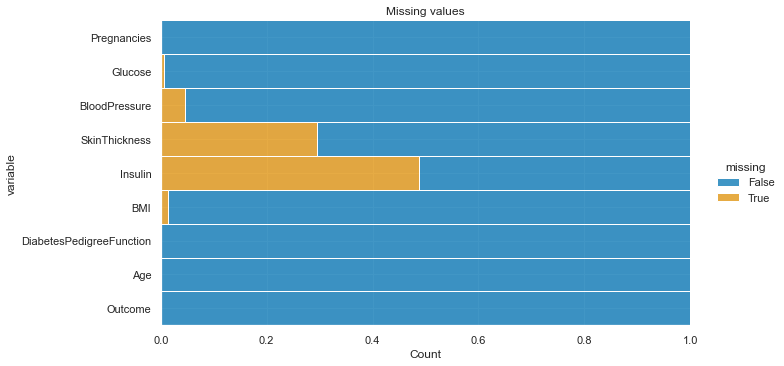

In [41]:
x = df.isnull().sum().tolist()
y = df.columns.tolist()

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    linewidth=1,
    palette = "colorblind",
    aspect=2
).set(title='Missing values')
#plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### 4.1. Impute values
For this dataset, I will handle missing values by calculating the mean of the feature and replace them. I used this approach because the dataset size is small and it can prevent data loss which results in removal of the rows and columns.

In [42]:
features_to_impute = df.columns[(df.isnull().sum() > 0)].tolist()
#features_to_throw = df.columns[df.isnull().sum()/len(df) > 0.05].tolist()
features_to_impute

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [43]:
# Calculate the mean and assign this value to the features with null values
for var in features_to_impute:
    # Calculate the mean
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    # Assign the mean
    temp_list = temp.iloc[0,:].tolist()
    df.loc[(df['Outcome'] == 0 ) & (df[var].isnull()), var] = temp_list[1]
    temp_list = temp.iloc[1,:].tolist()
    df.loc[(df['Outcome'] == 1 ) & (df[var].isnull()), var] = temp_list[1]

<Figure size 720x432 with 0 Axes>

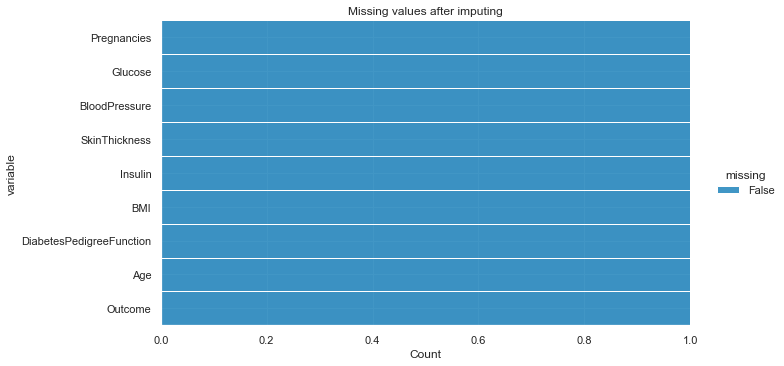

In [44]:
# Check that there are not missing values
x = df.isnull().sum().tolist()
y = df.columns.tolist()

plt.figure(figsize=(10,6))
sns.color_palette("rocket", as_cmap=True)
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    linewidth=1,
    palette = "colorblind",
    aspect=2
).set(title='Missing values after imputing')

## 2. Exploratory Data Analysis
In this process, I will analyze and investigate the dataset and summarize its main characteristics by employing several data visualization methods.

### 2.1. Correlation matrix
This visualization helps to see the extent of correlation between variables. All the numbers in the cells of a correlation matrix represent pairwise correlation coefficient values of the column and row variables. Every cell with the number 1 is part of the table’s diagonal. The diagonal implies that the correlation between a variable and itself is unity. The correlation matrix is a symmetrical matrix and a special type of covariance matrix.

<AxesSubplot:>

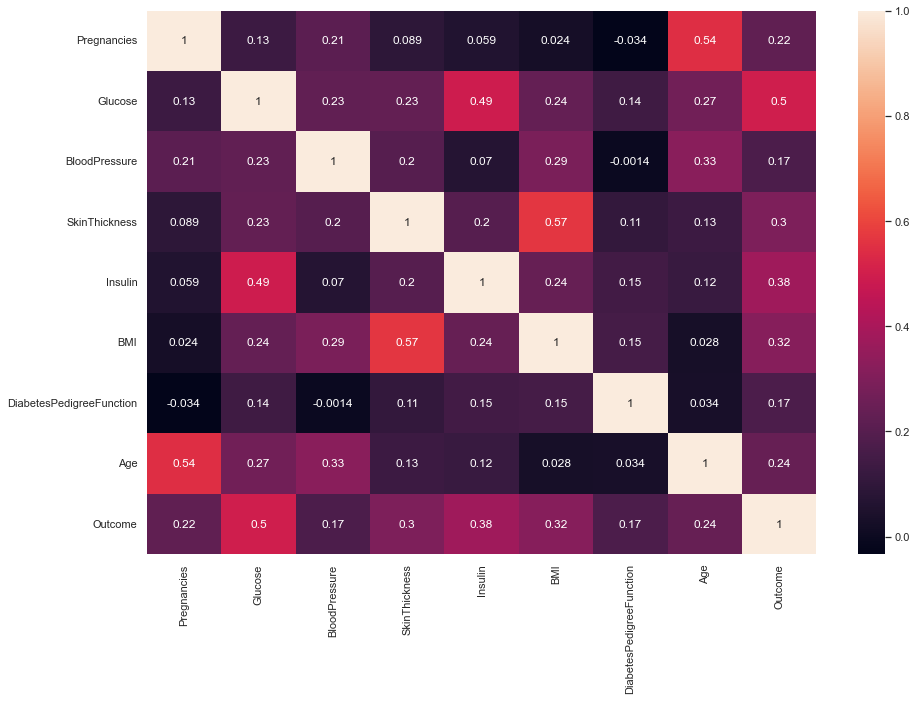

In [45]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

### 2.2. Pair plot
This visualization allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

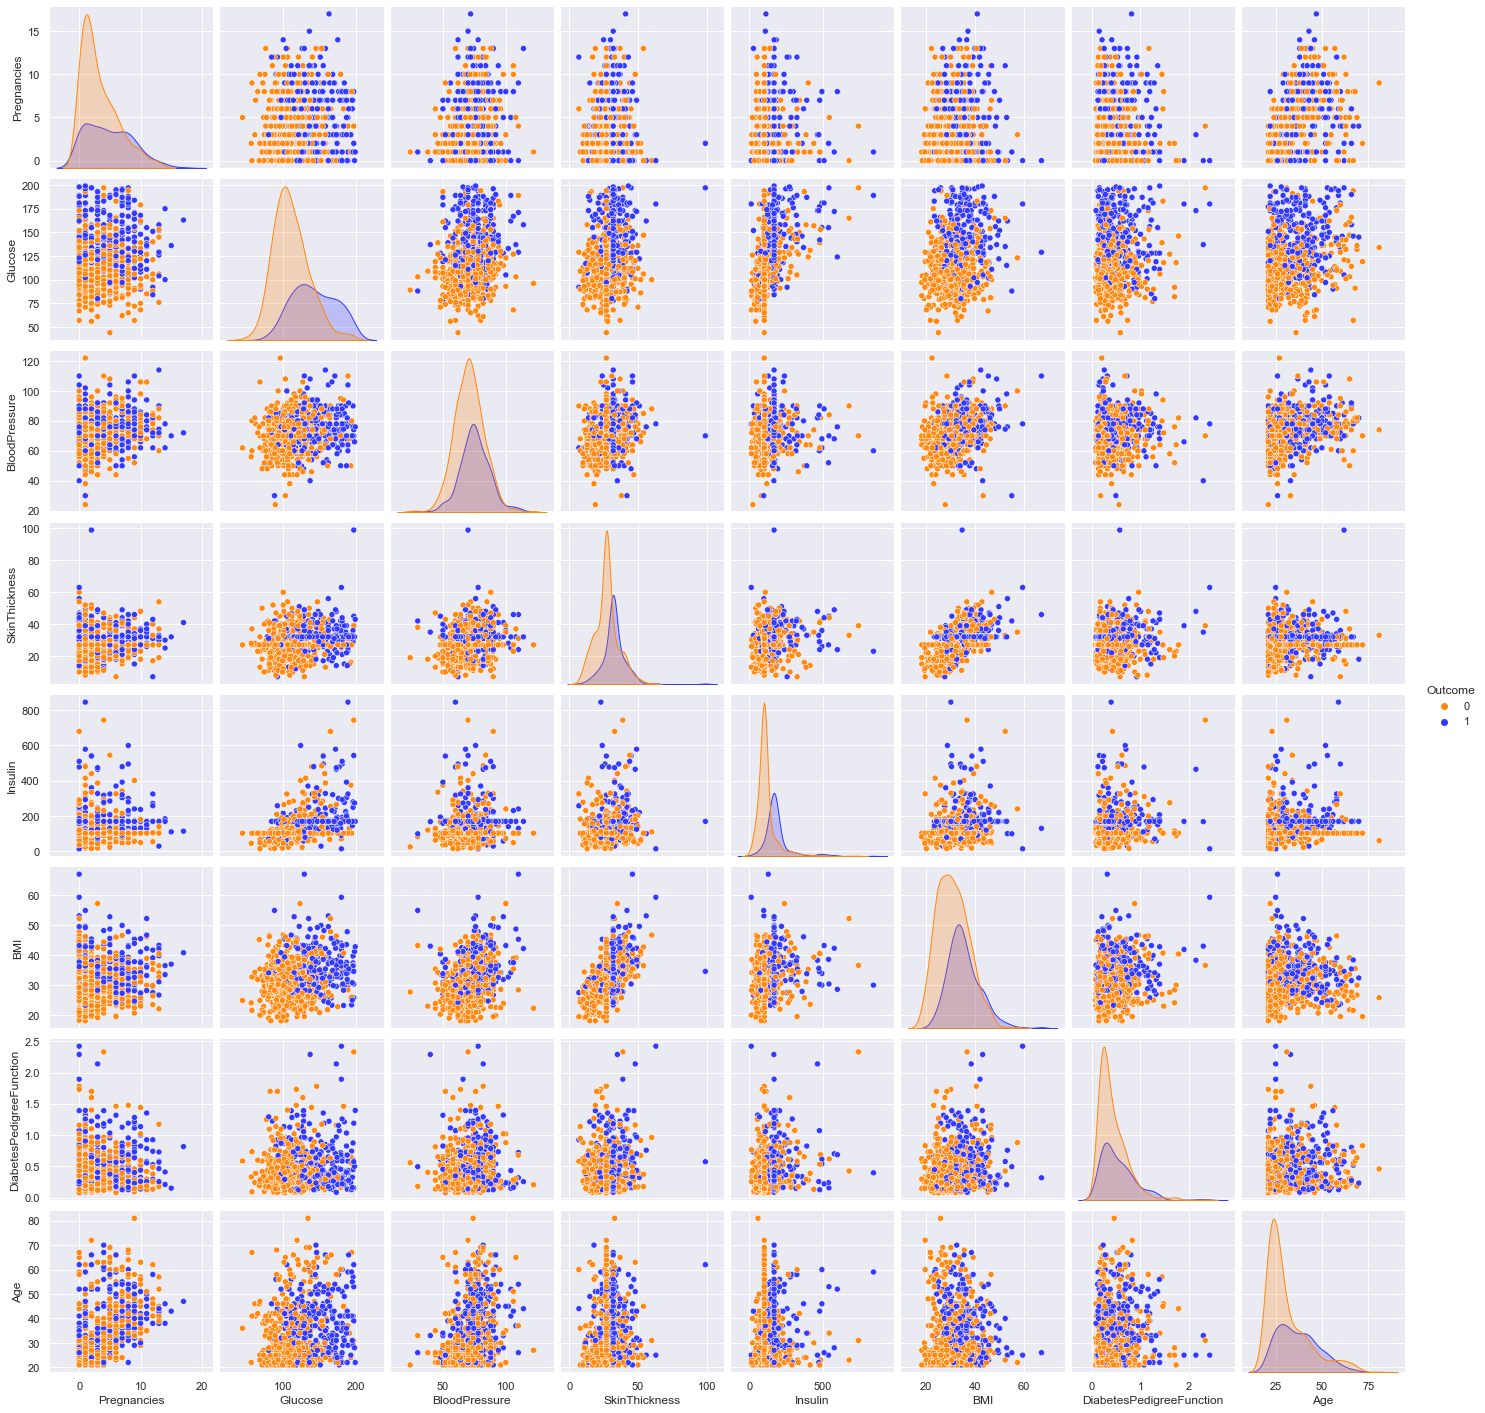

In [46]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
#sns.pairplot(df,hue='Outcome')
plt.show()

## 3. Select and train a model
In this section, I will split the data into 75% training and 25% test data

In [47]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


As it is not possible to know in advance which algorithm will work better with this dataset, I will compare a few and select the one with the "best score".

### 3.1. Logistic Regression

Logistic Regression accuracy is:  0.71354


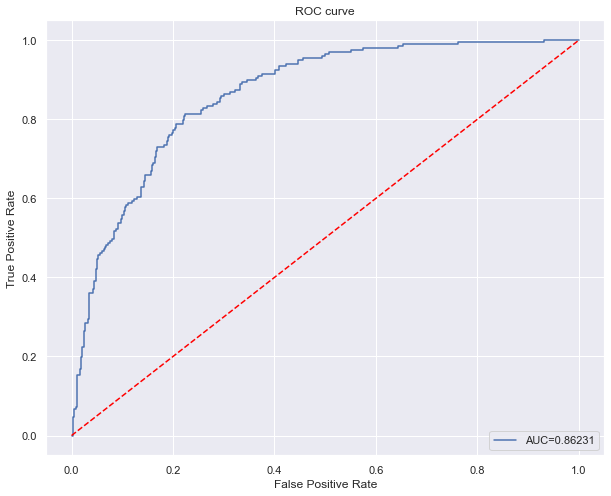

In [56]:
LogReg = LogisticRegression(solver='liblinear').fit(X_train,y_train)
predict_LogReg = LogReg.predict(X_test)
accuracy_LogReg = accuracy_score(y_test,predict_LogReg)
print('Logistic Regression accuracy is: ', round(accuracy_LogReg,5))

random_probs = [0 for _ in range(len(y_train))]
random_fpr, random_tpr, _ = roc_curve(y_train, random_probs)
    
y_pred_proba = LogReg.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train,y_pred_proba)
auc = round(roc_auc_score(y_train, y_pred_proba),5)

#create ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(random_fpr, random_tpr, linestyle='--', color = 'red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

### 3.2. KNN Model

Text(0.5, 1.0, 'KNN accuracy plot')

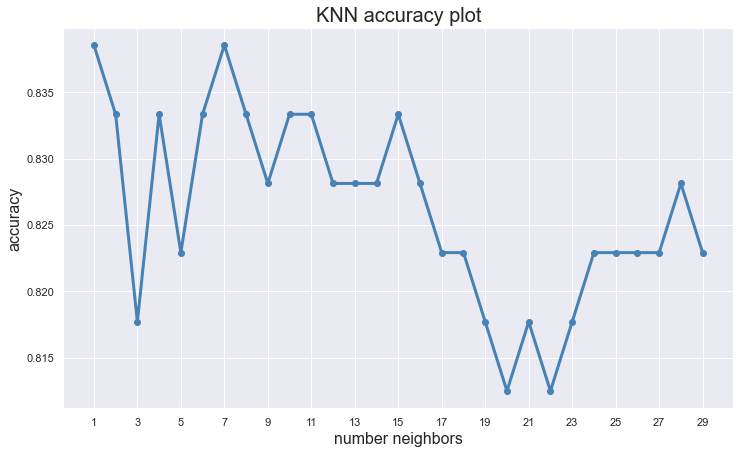

In [49]:
acc = []
wacc = []
allks = range(1,30)

# Generating an accuracy plot to find the K value with highest accuracy
for i in range(1,30):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    predicted_knn=knn.predict(X_test)
    score=accuracy_score(y_test,predicted_knn)
    acc.append(score)
    
# Generating the plot   
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,31,2))
plt.title('KNN accuracy plot', fontsize=20)
#ax.set_facecolor("black")
#ax.grid(alpha=0.25)

KNN model accuracy is:  0.83854
Confusion Matrix:


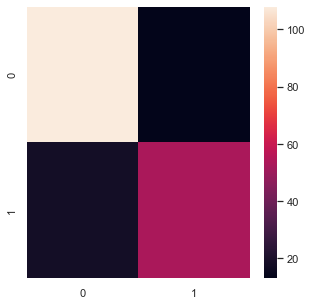

In [50]:
# K with value 1 and 7 have the highest accuracy. So, K=1 will be used.
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predicted_knn=knn.predict(X_test)
cm_knn=confusion_matrix(y_test,predicted_knn)
accuracy_knn=accuracy_score(y_test,predicted_knn)
print('KNN model accuracy is: ', round(accuracy_knn,5))

print("Confusion Matrix:")
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.heatmap(cm_knn)

### 3.3. Decision Tree

In [51]:
d_tree=DecisionTreeClassifier(max_depth = 2, max_leaf_nodes = 4)
d_tree.fit(X_train,y_train)
predicted_tree=d_tree.predict(X_test)
accuracy_tree=accuracy_score(y_test,predicted_tree)
print('Decision Tree accuracy is: ', round(accuracy_tree,5))

Decision Tree accuracy is:  0.83854


### 3.4. AdaBoost

AdaBoost accuracy is:  0.83333


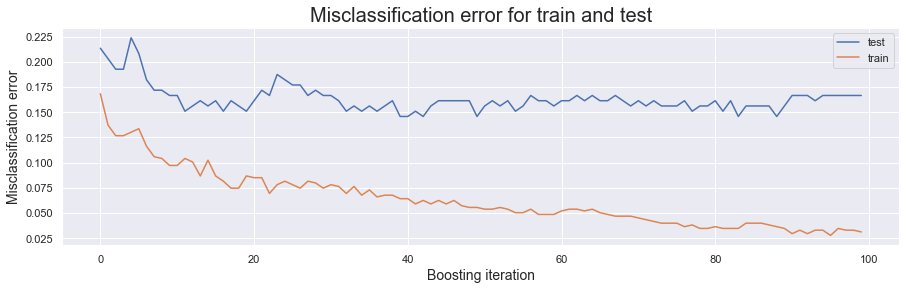

In [53]:
adaB = AdaBoostClassifier(n_estimators=100, random_state=0)
adaB.fit(X_train, y_train)
predicted_adaB=adaB.predict(X_test)
accuracy_adaB=accuracy_score(y_test,predicted_adaB)
print('AdaBoost accuracy is: ', round(accuracy_adaB,5))

y_test_score = [1-score for score in adaB.staged_score(X_test, y_test)]
y_train_score = [1-score for score in adaB.staged_score(X_train, y_train)]
x = np.arange(100)
# resizing the plot size
plt.figure(figsize=(15,4))
# generating the plot for test data
plt.plot(x,y_test_score, label = "test")
# generating the plot for train data
plt.plot(x,y_train_score, label = "train")
# naming the x axis
plt.xlabel('Boosting iteration',fontsize=14)
# naming the y axis
plt.ylabel('Misclassification error',fontsize=14)
# giving a title to my graph
plt.title('Misclassification error for train and test',fontsize=20)
#plt.grid(alpha=0.25)
plt.legend()

### 3.5. Random Forest

In [54]:
rforest = RandomForestClassifier(max_depth=2, random_state=0)
rforest.fit(X, y)
predicted_rforest=rforest.predict(X_test)
accuracy_rforest=accuracy_score(y_test,predicted_rforest)
print('Random Forest accuracy is: ', round(accuracy_rforest,5))

Random Forest accuracy is:  0.88542


### 3.6. SVM

In [55]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svm = SVC(kernel=k)
    svm.fit(X_train, y_train)
    predicted_svm = svm.predict(X_train)
    accuracy_svm = accuracy_score(y_train, predicted_svm)
    print('SVC {type} accuracy is: {score}'.format(type=k,score=round(accuracy_svm,5)))

SVC linear accuracy is: 0.78993
SVC poly accuracy is: 0.85069
SVC rbf accuracy is: 0.86111
SVC sigmoid accuracy is: 0.39236


## 4. Results and Conclusion
After running the experiments on the training set obtained, I compared the training models based on their accuracy. The comparison table is given below:

Machine Learning Classifier | Accuracy
---|---
Logistic Regression | 0.71354
KNN | 0.83854
Decision Tree | 0.83854
AdaBoost | 0.83333
Random Forest | 0.88542
SVM (rbf) | 0.86111

From the above, the test accuracy of the various models is generally within the same range, from approximately 71% to 88%. Based on the accuracy score, I conclude that Random Forest algorithm produced the best result to solve this problem.

## Github repo URL
https://github.com/clebastard21/ML_Diabetes.git